## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.12675047, 0.62048195, 0.33080672],
       [0.18250709, 0.23890656, 0.37935536],
       [0.09730893, 0.67368179, 0.93447227],
       [0.77377828, 0.79974346, 0.82296556],
       [0.91146464, 0.55077033, 0.71536611]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.12675047 5.62048195 5.33080672]
 [5.18250709 5.23890656 5.37935536]
 [5.09730893 5.67368179 5.93447227]
 [5.77377828 5.79974346 5.82296556]
 [5.91146464 5.55077033 5.71536611]]


In [5]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.51049661 0.29686337 0.73947105 0.86654567 0.69391953]
 [0.29686337 0.23429567 0.53320363 0.64448038 0.56930937]
 [0.73947105 0.53320363 1.33655461 1.38310664 1.12822739]
 [0.86654567 0.64448038 1.38310664 1.91559475 1.73446819]
 [0.69391953 0.56930937 1.12822739 1.73446819 1.64586442]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.35934638 0.266923   0.56848766 0.7988291  0.72586703]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# YOUR CODE

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [9]:
x = torch.rand(5, 3)
x

tensor([[0.3466, 0.8094, 0.8742],
        [0.8508, 0.8145, 0.5224],
        [0.5733, 0.0887, 0.1489],
        [0.8310, 0.7870, 0.4983],
        [0.7858, 0.2623, 0.9735]])

In [10]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [11]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.3466, 5.8094, 5.8742],
        [5.8508, 5.8145, 5.5224],
        [5.5733, 5.0887, 5.1489],
        [5.8310, 5.7870, 5.4983],
        [5.7858, 5.2623, 5.9735]])


In [12]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.5394, 1.4108, 0.4007, 1.3607, 1.3357],
        [1.4108, 1.6601, 0.6377, 1.6084, 1.3908],
        [0.4007, 0.6377, 0.3587, 0.6204, 0.6187],
        [1.3607, 1.6084, 0.6204, 1.5583, 1.3447],
        [1.3357, 1.3908, 0.6187, 1.3447, 1.6342]])

X X^T  (2):
tensor([[1.5394, 1.4108, 0.4007, 1.3607, 1.3357],
        [1.4108, 1.6601, 0.6377, 1.6084, 1.3908],
        [0.4007, 0.6377, 0.3587, 0.6204, 0.6187],
        [1.3607, 1.6084, 0.6204, 1.5583, 1.3447],
        [1.3357, 1.3908, 0.6187, 1.3447, 1.6342]])


In [13]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.6767, 0.7292, 0.2703, 0.7055, 0.6739])


In [14]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [15]:
# YOUR CODE
torch.sum(torch.arange(1, 10000 + 1)**2)

tensor(333383335000)

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [16]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[9.0000e-39, 1.0010e-38, 1.0561e-38],
        [4.2246e-39, 1.0286e-38, 1.0653e-38],
        [1.0194e-38, 8.4490e-39, 1.0469e-38],
        [9.3674e-39, 9.9184e-39, 8.7245e-39],
        [9.2755e-39, 8.9082e-39, 9.9184e-39]])


In [17]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.0091, 0.7199, 0.9279],
        [0.0747, 0.9732, 0.7308],
        [0.4412, 0.4149, 0.5417],
        [0.2448, 0.6730, 0.7411],
        [0.6870, 0.8040, 0.6334]])


In [18]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [19]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [20]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x1, x1.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [21]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[ 0.5973,  0.1798,  1.3315],
        [-0.6869,  1.9497,  0.2309],
        [-0.0475, -0.0550,  0.1939],
        [ 0.3163,  1.1522, -1.0072],
        [-0.4835,  1.6867,  0.4371]]) torch.Size([5, 3])


In [22]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 1.3962,  1.1256,  1.7417],
        [-0.1643,  2.7104,  1.1087],
        [-0.0194, -0.0148,  0.8140],
        [ 0.6270,  1.4458, -0.4222],
        [ 0.0241,  2.5646,  0.6598]])


In [23]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 1.3962,  1.1256,  1.7417],
        [-0.1643,  2.7104,  1.1087],
        [-0.0194, -0.0148,  0.8140],
        [ 0.6270,  1.4458, -0.4222],
        [ 0.0241,  2.5646,  0.6598]])


In [24]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 1.3962,  1.1256,  1.7417],
        [-0.1643,  2.7104,  1.1087],
        [-0.0194, -0.0148,  0.8140],
        [ 0.6270,  1.4458, -0.4222],
        [ 0.0241,  2.5646,  0.6598]])


In [25]:
print(x * y)  # поэлементное умножение

tensor([[ 4.7717e-01,  1.7005e-01,  5.4619e-01],
        [-3.5897e-01,  1.4831e+00,  2.0269e-01],
        [-1.3303e-03, -2.2123e-03,  1.2023e-01],
        [ 9.8278e-02,  3.3832e-01, -5.8923e-01],
        [-2.4542e-01,  1.4808e+00,  9.7369e-02]])


In [26]:
print(x @ y.t())  # матричное умножение

tensor([[ 1.1934,  1.6177,  0.8496,  1.0174,  0.7576],
        [ 1.3901,  1.3269,  0.2023,  0.4941,  1.4145],
        [-0.0104,  0.1035,  0.1167,  0.0825, -0.0292],
        [ 0.9294,  0.1577, -0.5694, -0.1526,  0.9477],
        [ 1.3883,  1.4140,  0.3253,  0.6007,  1.3327]])


In [27]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[ 1.1934,  1.6177,  0.8496,  1.0174,  0.7576],
        [ 1.3901,  1.3269,  0.2023,  0.4941,  1.4145],
        [-0.0104,  0.1035,  0.1167,  0.0825, -0.0292],
        [ 0.9294,  0.1577, -0.5694, -0.1526,  0.9477],
        [ 1.3883,  1.4140,  0.3253,  0.6007,  1.3327]])


In [28]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [29]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [30]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

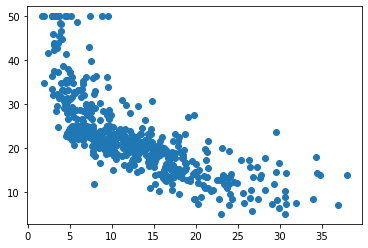

In [32]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

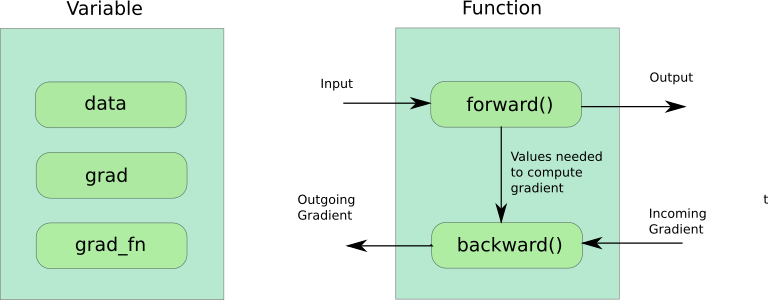

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [33]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [41]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [42]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.0527])
dL/db = 
 tensor([-43.9358])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`, тогда у нас будет возможность изменить данные:

In [44]:
w.data

tensor([0.5880])

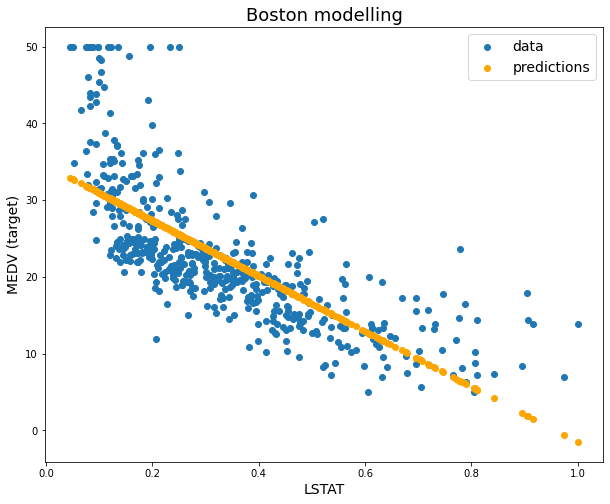

loss =  38.482967


In [48]:
from IPython.display import clear_output

for i in range(1000):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad  # YOUR CODE
    b.data -=  0.05 * b.grad  # YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=1, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже - нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```python
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [81]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [82]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [83]:
our_dataset = RandomDataset(x, y)

In [84]:
our_dataset.__getitem__(1)  # our_dataset[1]

{'sample': tensor([0.9898, 0.2596, 0.9622, 0.1753, 0.0848]),
 'target': 0.47604184274568273}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [85]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [86]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.3724, 0.3645, 0.5849, 0.7641, 0.0352],
        [0.9898, 0.2596, 0.9622, 0.1753, 0.0848],
        [0.8442, 0.4685, 0.9713, 0.3202, 0.2087],
        [0.6060, 0.6283, 0.6265, 0.5958, 0.1031]])
Target:
tensor([0.5557, 0.4760, 0.1968, 0.7429], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```python
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [87]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 10-ю на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 10-ю нейронами на вход и 1-м на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [88]:
y_pred = model(batch['sample']) # получили предсказания модели
y_pred

tensor([[0.0602],
        [0.0153],
        [0.0238],
        [0.0427]], grad_fn=<AddmmBackward0>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [89]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

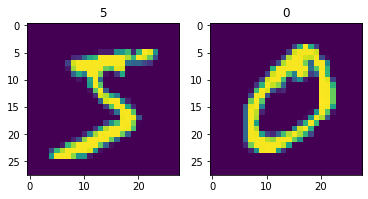

In [90]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [91]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [92]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0027,  0.0238,  0.0081,  ..., -0.0203,  0.0224,  0.0341],
          [-0.0259, -0.0097, -0.0213,  ...,  0.0056,  0.0196, -0.0345],
          [ 0.0192, -0.0119,  0.0241,  ..., -0.0240,  0.0096, -0.0262],
          ...,
          [ 0.0210, -0.0257, -0.0061,  ...,  0.0147, -0.0167,  0.0155],
          [ 0.0299, -0.0164,  0.0356,  ..., -0.0325, -0.0139, -0.0162],
          [-0.0165, -0.0247, -0.0014,  ..., -0.0065,  0.0184,  0.0275]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0103,  0.0262,  0.0094,  0.0225, -0.0194, -0.0355, -0.0153,  0.0015,
           0.0041,  0.0079,  0.0063,  0.0020,  0.0191, -0.0127,  0.0005,  0.0063,
           0.0063,  0.0204,  0.0273, -0.0129,  0.0328, -0.0182,  0.0192,  0.0342,
           0.0351, -0.0074, -0.0294, -0.0275,  0.0356,  0.0014,  0.0131,  0.0265,
           0.0261, -0.0071,  0.0098,  0.0072, -0.0143, -0.0066, -0.0334, -0.0267,
           0.0015, -0.0096, -0.0277, 

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [93]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Currently logged in as: bimastics (use `wandb login --relogin` to force relogin)


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [94]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс F = torch.nn.functional
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
#         wandb.log({"mean val loss": np.mean(val_loss),
#                    "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.17796830832958221, accuracy: 0.943


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08714734017848969, accuracy: 0.9764


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07071573287248611, accuracy: 0.9792


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)

In [159]:
a = torch.randn(2, 3, 3)
a

tensor([[[-0.3133,  1.1422, -1.1156],
         [-0.5535,  0.1552,  0.3090],
         [-0.5082,  1.4242, -1.8688]],

        [[ 0.2631, -0.7009, -1.2938],
         [-1.5664, -0.6745, -0.2205],
         [ 1.3992, -0.9857,  0.8161]]])

In [160]:
torch.argmax(a, dim=-1)

tensor([[1, 2, 1],
        [0, 2, 0]])

In [161]:
torch.argmax(a, dim=1)

tensor([[0, 2, 1],
        [2, 1, 2]])